## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Small Unet-Depth1(No Augmentation)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
data_dir_list=os.chdir('/content/drive/My Drive/SSDL/Day3/DATA')


In [0]:
import os
import cv2
import numpy as np
PATH = os.getcwd()
data_path = PATH + '/D1'
data_dir_list = os.listdir(data_path)

In [4]:
img_data_list=[]
for dataset in data_dir_list:
    img_list= sorted(os.listdir(data_path+'/'+ dataset))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    var=0;
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        var=var+1
        if var==20:
          break
print("Loaded_Sccessfully")
data = np.array(img_data_list)
print(data.shape)

Loaded the images of dataset-Data

Loaded_Sccessfully
(20, 128, 128)


In [5]:
PATH1 = os.getcwd()
data_path1 = PATH1 + '/L1'
data_dir_list1 = os.listdir(data_path1)
print(data_dir_list1)

['label']


In [6]:
img_data_list1=[]
for dataset1 in data_dir_list1:
    img_list1=sorted(os.listdir(data_path1+'/'+ dataset1))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset1))
    var=0;
    for img1 in img_list1:
        input_img1=cv2.imread(data_path1 + '/'+ dataset1 + '/'+ img1 )
        input_img1=cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)
        input_img_resize1=cv2.resize(input_img1,(128,128))
        img_data_list1.append(input_img_resize1)
        var=var+1
        if var==20:
          break
label= np.array(img_data_list1)
print(label.shape)

Loaded the images of dataset-label

(20, 128, 128)


(128, 128)


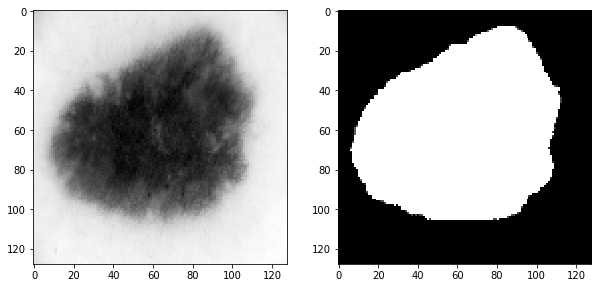

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(data [0],'gray')
plt.subplot(122).imshow(label[0],'gray')
print(data[0].shape)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
x,y = shuffle(data,label, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [0]:
X_train = np.reshape(X_train,(-1,128,128,1))
y_train = np.reshape(y_train,(-1,128,128,1))

X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')/255

X_test = np.reshape(X_test,(-1,128,128,1))
y_test = np.reshape(y_test,(-1,128,128,1))

X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')/255

In [10]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16, 128, 128, 1)
(16, 128, 128, 1)
(4, 128, 128, 1)
(4, 128, 128, 1)


In [11]:
mean = np.mean(X_train)
std = np.std(X_train)

print(mean)
print(std)

X_train = X_train-mean
X_train = X_train/std

X_test = X_test-mean
X_test = X_test/std

0.5904963
0.1954056


In [12]:
!pip install medpy
from keras.layers import *
import keras
from keras import Model
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
from medpy.metric import dc, precision, recall

Using TensorFlow backend.


In [13]:
input_layer = Input(shape=(128,128,1))

c1 = Conv2D(8, (3,3),  padding='same')(input_layer)
a1 = Activation('relu')(c1)
p1 = MaxPooling2D(pool_size=(2,2)) (a1)

c2 = Conv2D(16, (3,3),  padding='same')(p1)
a2 = Activation('relu')(c2)
p2 = MaxPooling2D(pool_size=(2,2)) (a2)

ct = Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2))(p2)
add1 = Add()([a2,ct])
ct2 = Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2))(add1)
c3 = Conv2D(1, (3,3),  padding='same')(ct2)

model = Model(input_layer,c3)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 8)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 64, 64, 8)    0           activation_1[0][0]               
_____________________________________

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('1Small_unet_pool.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=[dice_coef,'accuracy'])

In [0]:
history = model.fit(X_train, y_train,validation_split = (0.2),epochs=1000,verbose=1,callbacks=[es,mc])

Train on 576 samples, validate on 144 samples
Epoch 1/1000
576/576 [==============================] - 2s 3ms/step - loss: 0.1961 - dice_coef: 0.2741 - acc: 0.7526 - val_loss: 0.1655 - val_dice_coef: 0.4306 - val_acc: 0.7817

Epoch 00001: val_loss improved from inf to 0.16547, saving model to 1Small_unet_pool.h5
Epoch 2/1000
576/576 [==============================] - 1s 905us/step - loss: 0.1616 - dice_coef: 0.3775 - acc: 0.7744 - val_loss: 0.1617 - val_dice_coef: 0.4123 - val_acc: 0.7795

Epoch 00002: val_loss improved from 0.16547 to 0.16172, saving model to 1Small_unet_pool.h5
Epoch 3/1000
576/576 [==============================] - 1s 911us/step - loss: 0.1583 - dice_coef: 0.3975 - acc: 0.7869 - val_loss: 0.1603 - val_dice_coef: 0.3986 - val_acc: 0.7749

Epoch 00003: val_loss improved from 0.16172 to 0.16034, saving model to 1Small_unet_pool.h5
Epoch 4/1000
576/576 [==============================] - 1s 912us/step - loss: 0.1565 - dice_coef: 0.3977 - acc: 0.7860 - val_loss: 0.1577 - v


Epoch 00032: val_loss improved from 0.13159 to 0.13125, saving model to 1Small_unet_pool.h5
Epoch 33/1000
576/576 [==============================] - 1s 905us/step - loss: 0.1236 - dice_coef: 0.5230 - acc: 0.8335 - val_loss: 0.1299 - val_dice_coef: 0.5349 - val_acc: 0.8217

Epoch 00033: val_loss improved from 0.13125 to 0.12989, saving model to 1Small_unet_pool.h5
Epoch 34/1000
576/576 [==============================] - 1s 902us/step - loss: 0.1238 - dice_coef: 0.5217 - acc: 0.8320 - val_loss: 0.1317 - val_dice_coef: 0.5568 - val_acc: 0.8219

Epoch 00034: val_loss did not improve from 0.12989
Epoch 35/1000
576/576 [==============================] - 1s 911us/step - loss: 0.1253 - dice_coef: 0.5262 - acc: 0.8297 - val_loss: 0.1312 - val_dice_coef: 0.5425 - val_acc: 0.8224

Epoch 00035: val_loss did not improve from 0.12989
Epoch 36/1000
576/576 [==============================] - 1s 914us/step - loss: 0.1233 - dice_coef: 0.5212 - acc: 0.8332 - val_loss: 0.1301 - val_dice_coef: 0.5202 - va


Epoch 00065: val_loss did not improve from 0.12486
Epoch 66/1000
576/576 [==============================] - 1s 911us/step - loss: 0.1187 - dice_coef: 0.5399 - acc: 0.8395 - val_loss: 0.1256 - val_dice_coef: 0.5402 - val_acc: 0.8270

Epoch 00066: val_loss did not improve from 0.12486
Epoch 67/1000
576/576 [==============================] - 1s 874us/step - loss: 0.1189 - dice_coef: 0.5437 - acc: 0.8383 - val_loss: 0.1273 - val_dice_coef: 0.5353 - val_acc: 0.8254

Epoch 00067: val_loss did not improve from 0.12486
Epoch 68/1000
576/576 [==============================] - 1s 900us/step - loss: 0.1188 - dice_coef: 0.5412 - acc: 0.8387 - val_loss: 0.1259 - val_dice_coef: 0.5351 - val_acc: 0.8299

Epoch 00068: val_loss did not improve from 0.12486
Epoch 69/1000
576/576 [==============================] - 1s 890us/step - loss: 0.1177 - dice_coef: 0.5471 - acc: 0.8394 - val_loss: 0.1252 - val_dice_coef: 0.5407 - val_acc: 0.8273

Epoch 00069: val_loss did not improve from 0.12486
Epoch 70/1000
57

576/576 [==============================] - 1s 930us/step - loss: 0.1159 - dice_coef: 0.5544 - acc: 0.8426 - val_loss: 0.1229 - val_dice_coef: 0.5510 - val_acc: 0.8338

Epoch 00100: val_loss did not improve from 0.12253
Epoch 101/1000
576/576 [==============================] - 1s 896us/step - loss: 0.1155 - dice_coef: 0.5550 - acc: 0.8436 - val_loss: 0.1248 - val_dice_coef: 0.5650 - val_acc: 0.8321

Epoch 00101: val_loss did not improve from 0.12253
Epoch 102/1000
576/576 [==============================] - 1s 894us/step - loss: 0.1156 - dice_coef: 0.5552 - acc: 0.8442 - val_loss: 0.1233 - val_dice_coef: 0.5630 - val_acc: 0.8319

Epoch 00102: val_loss did not improve from 0.12253
Epoch 103/1000
576/576 [==============================] - 0s 863us/step - loss: 0.1167 - dice_coef: 0.5500 - acc: 0.8424 - val_loss: 0.1221 - val_dice_coef: 0.5634 - val_acc: 0.8323

Epoch 00103: val_loss improved from 0.12253 to 0.12205, saving model to 1Small_unet_pool.h5
Epoch 104/1000
576/576 [==============

576/576 [==============================] - 1s 908us/step - loss: 0.1134 - dice_coef: 0.5645 - acc: 0.8462 - val_loss: 0.1207 - val_dice_coef: 0.5553 - val_acc: 0.8360

Epoch 00134: val_loss did not improve from 0.11958
Epoch 135/1000
576/576 [==============================] - 1s 903us/step - loss: 0.1130 - dice_coef: 0.5649 - acc: 0.8473 - val_loss: 0.1217 - val_dice_coef: 0.5560 - val_acc: 0.8356

Epoch 00135: val_loss did not improve from 0.11958
Epoch 136/1000
576/576 [==============================] - 1s 905us/step - loss: 0.1138 - dice_coef: 0.5643 - acc: 0.8464 - val_loss: 0.1209 - val_dice_coef: 0.5610 - val_acc: 0.8370

Epoch 00136: val_loss did not improve from 0.11958
Epoch 137/1000
576/576 [==============================] - 1s 896us/step - loss: 0.1146 - dice_coef: 0.5551 - acc: 0.8459 - val_loss: 0.1198 - val_dice_coef: 0.5621 - val_acc: 0.8379

Epoch 00137: val_loss did not improve from 0.11958
Epoch 138/1000
576/576 [==============================] - 1s 901us/step - loss:

576/576 [==============================] - 1s 910us/step - loss: 0.1128 - dice_coef: 0.5704 - acc: 0.8475 - val_loss: 0.1203 - val_dice_coef: 0.5815 - val_acc: 0.8359

Epoch 00168: val_loss did not improve from 0.11866
Epoch 169/1000
576/576 [==============================] - 1s 906us/step - loss: 0.1132 - dice_coef: 0.5661 - acc: 0.8464 - val_loss: 0.1209 - val_dice_coef: 0.5380 - val_acc: 0.8358

Epoch 00169: val_loss did not improve from 0.11866
Epoch 170/1000
576/576 [==============================] - 1s 903us/step - loss: 0.1123 - dice_coef: 0.5599 - acc: 0.8490 - val_loss: 0.1203 - val_dice_coef: 0.5607 - val_acc: 0.8381

Epoch 00170: val_loss did not improve from 0.11866
Epoch 171/1000
576/576 [==============================] - 1s 908us/step - loss: 0.1118 - dice_coef: 0.5724 - acc: 0.8487 - val_loss: 0.1223 - val_dice_coef: 0.5441 - val_acc: 0.8340

Epoch 00171: val_loss did not improve from 0.11866
Epoch 172/1000
576/576 [==============================] - 1s 910us/step - loss:


Epoch 00202: val_loss did not improve from 0.11797
Epoch 203/1000
576/576 [==============================] - 1s 913us/step - loss: 0.1118 - dice_coef: 0.5705 - acc: 0.8494 - val_loss: 0.1190 - val_dice_coef: 0.5833 - val_acc: 0.8380

Epoch 00203: val_loss did not improve from 0.11797
Epoch 204/1000
576/576 [==============================] - 1s 912us/step - loss: 0.1121 - dice_coef: 0.5728 - acc: 0.8487 - val_loss: 0.1193 - val_dice_coef: 0.5903 - val_acc: 0.8348

Epoch 00204: val_loss did not improve from 0.11797
Epoch 205/1000
576/576 [==============================] - 1s 910us/step - loss: 0.1110 - dice_coef: 0.5674 - acc: 0.8499 - val_loss: 0.1186 - val_dice_coef: 0.5824 - val_acc: 0.8398

Epoch 00205: val_loss did not improve from 0.11797
Epoch 206/1000
576/576 [==============================] - 1s 917us/step - loss: 0.1120 - dice_coef: 0.5691 - acc: 0.8495 - val_loss: 0.1188 - val_dice_coef: 0.5634 - val_acc: 0.8387

Epoch 00206: val_loss did not improve from 0.11797
Epoch 207/10

576/576 [==============================] - 1s 902us/step - loss: 0.1116 - dice_coef: 0.5750 - acc: 0.8507 - val_loss: 0.1202 - val_dice_coef: 0.5857 - val_acc: 0.8390

Epoch 00272: val_loss did not improve from 0.11732
Epoch 273/1000
576/576 [==============================] - 1s 906us/step - loss: 0.1100 - dice_coef: 0.5701 - acc: 0.8514 - val_loss: 0.1172 - val_dice_coef: 0.5726 - val_acc: 0.8423

Epoch 00273: val_loss improved from 0.11732 to 0.11718, saving model to 1Small_unet_pool.h5
Epoch 274/1000
576/576 [==============================] - 1s 900us/step - loss: 0.1098 - dice_coef: 0.5792 - acc: 0.8522 - val_loss: 0.1177 - val_dice_coef: 0.5816 - val_acc: 0.8420

Epoch 00274: val_loss did not improve from 0.11718
Epoch 275/1000
576/576 [==============================] - 1s 907us/step - loss: 0.1104 - dice_coef: 0.5819 - acc: 0.8510 - val_loss: 0.1171 - val_dice_coef: 0.5715 - val_acc: 0.8410

Epoch 00275: val_loss improved from 0.11718 to 0.11714, saving model to 1Small_unet_pool.


Epoch 00306: val_loss improved from 0.11706 to 0.11680, saving model to 1Small_unet_pool.h5
Epoch 307/1000
576/576 [==============================] - 1s 910us/step - loss: 0.1095 - dice_coef: 0.5829 - acc: 0.8528 - val_loss: 0.1176 - val_dice_coef: 0.5919 - val_acc: 0.8407

Epoch 00307: val_loss did not improve from 0.11680
Epoch 308/1000
576/576 [==============================] - 1s 911us/step - loss: 0.1100 - dice_coef: 0.5718 - acc: 0.8516 - val_loss: 0.1171 - val_dice_coef: 0.5826 - val_acc: 0.8422

Epoch 00308: val_loss did not improve from 0.11680
Epoch 309/1000
576/576 [==============================] - 1s 904us/step - loss: 0.1115 - dice_coef: 0.5782 - acc: 0.8504 - val_loss: 0.1210 - val_dice_coef: 0.5562 - val_acc: 0.8365

Epoch 00309: val_loss did not improve from 0.11680
Epoch 310/1000
576/576 [==============================] - 1s 908us/step - loss: 0.1137 - dice_coef: 0.5618 - acc: 0.8476 - val_loss: 0.1181 - val_dice_coef: 0.5669 - val_acc: 0.8393

Epoch 00310: val_loss 

576/576 [==============================] - 1s 896us/step - loss: 0.1090 - dice_coef: 0.5820 - acc: 0.8532 - val_loss: 0.1161 - val_dice_coef: 0.5670 - val_acc: 0.8439

Epoch 00376: val_loss improved from 0.11620 to 0.11613, saving model to 1Small_unet_pool.h5
Epoch 377/1000
576/576 [==============================] - 1s 900us/step - loss: 0.1088 - dice_coef: 0.5802 - acc: 0.8537 - val_loss: 0.1189 - val_dice_coef: 0.5766 - val_acc: 0.8401

Epoch 00377: val_loss did not improve from 0.11613
Epoch 378/1000
576/576 [==============================] - 1s 950us/step - loss: 0.1097 - dice_coef: 0.5729 - acc: 0.8523 - val_loss: 0.1194 - val_dice_coef: 0.6012 - val_acc: 0.8415

Epoch 00378: val_loss did not improve from 0.11613
Epoch 379/1000
576/576 [==============================] - 1s 903us/step - loss: 0.1110 - dice_coef: 0.5783 - acc: 0.8515 - val_loss: 0.1191 - val_dice_coef: 0.5964 - val_acc: 0.8414

Epoch 00379: val_loss did not improve from 0.11613
Epoch 380/1000
576/576 [==============


Epoch 00410: val_loss did not improve from 0.11600
Epoch 411/1000
576/576 [==============================] - 1s 910us/step - loss: 0.1102 - dice_coef: 0.5720 - acc: 0.8519 - val_loss: 0.1170 - val_dice_coef: 0.5966 - val_acc: 0.8436

Epoch 00411: val_loss did not improve from 0.11600
Epoch 412/1000
576/576 [==============================] - 1s 905us/step - loss: 0.1081 - dice_coef: 0.5844 - acc: 0.8540 - val_loss: 0.1171 - val_dice_coef: 0.5814 - val_acc: 0.8437

Epoch 00412: val_loss did not improve from 0.11600
Epoch 413/1000
576/576 [==============================] - 1s 909us/step - loss: 0.1091 - dice_coef: 0.5839 - acc: 0.8533 - val_loss: 0.1183 - val_dice_coef: 0.5751 - val_acc: 0.8440

Epoch 00413: val_loss did not improve from 0.11600
Epoch 414/1000
576/576 [==============================] - 1s 899us/step - loss: 0.1111 - dice_coef: 0.5744 - acc: 0.8504 - val_loss: 0.1174 - val_dice_coef: 0.5641 - val_acc: 0.8421

Epoch 00414: val_loss did not improve from 0.11600
Epoch 415/10


Epoch 00479: val_loss did not improve from 0.11552
Epoch 480/1000
576/576 [==============================] - 1s 912us/step - loss: 0.1089 - dice_coef: 0.5799 - acc: 0.8535 - val_loss: 0.1159 - val_dice_coef: 0.5818 - val_acc: 0.8449

Epoch 00480: val_loss did not improve from 0.11552
Epoch 481/1000
576/576 [==============================] - 1s 913us/step - loss: 0.1091 - dice_coef: 0.5800 - acc: 0.8526 - val_loss: 0.1165 - val_dice_coef: 0.5901 - val_acc: 0.8447

Epoch 00481: val_loss did not improve from 0.11552
Epoch 482/1000
576/576 [==============================] - 1s 906us/step - loss: 0.1081 - dice_coef: 0.5800 - acc: 0.8543 - val_loss: 0.1162 - val_dice_coef: 0.5861 - val_acc: 0.8447

Epoch 00482: val_loss did not improve from 0.11552
Epoch 483/1000
576/576 [==============================] - 1s 901us/step - loss: 0.1079 - dice_coef: 0.5859 - acc: 0.8548 - val_loss: 0.1159 - val_dice_coef: 0.5756 - val_acc: 0.8436

Epoch 00483: val_loss did not improve from 0.11552
Epoch 484/10


Epoch 00514: val_loss did not improve from 0.11536
Epoch 515/1000
576/576 [==============================] - 1s 909us/step - loss: 0.1087 - dice_coef: 0.5803 - acc: 0.8538 - val_loss: 0.1167 - val_dice_coef: 0.6033 - val_acc: 0.8420

Epoch 00515: val_loss did not improve from 0.11536
Epoch 516/1000
576/576 [==============================] - 1s 909us/step - loss: 0.1081 - dice_coef: 0.5839 - acc: 0.8538 - val_loss: 0.1161 - val_dice_coef: 0.5808 - val_acc: 0.8432

Epoch 00516: val_loss did not improve from 0.11536
Epoch 517/1000
576/576 [==============================] - 1s 912us/step - loss: 0.1083 - dice_coef: 0.5863 - acc: 0.8546 - val_loss: 0.1163 - val_dice_coef: 0.5910 - val_acc: 0.8448

Epoch 00517: val_loss did not improve from 0.11536
Epoch 518/1000
576/576 [==============================] - 1s 910us/step - loss: 0.1081 - dice_coef: 0.5821 - acc: 0.8548 - val_loss: 0.1171 - val_dice_coef: 0.5723 - val_acc: 0.8429

Epoch 00518: val_loss did not improve from 0.11536
Epoch 519/10


Epoch 00549: val_loss did not improve from 0.11527
Epoch 550/1000
576/576 [==============================] - 1s 916us/step - loss: 0.1082 - dice_coef: 0.5842 - acc: 0.8544 - val_loss: 0.1173 - val_dice_coef: 0.6012 - val_acc: 0.8432

Epoch 00550: val_loss did not improve from 0.11527
Epoch 551/1000
576/576 [==============================] - 1s 907us/step - loss: 0.1088 - dice_coef: 0.5829 - acc: 0.8542 - val_loss: 0.1184 - val_dice_coef: 0.5881 - val_acc: 0.8421

Epoch 00551: val_loss did not improve from 0.11527
Epoch 552/1000
576/576 [==============================] - 1s 922us/step - loss: 0.1078 - dice_coef: 0.5771 - acc: 0.8556 - val_loss: 0.1168 - val_dice_coef: 0.5986 - val_acc: 0.8444

Epoch 00552: val_loss did not improve from 0.11527
Epoch 553/1000
576/576 [==============================] - 1s 909us/step - loss: 0.1088 - dice_coef: 0.5814 - acc: 0.8541 - val_loss: 0.1154 - val_dice_coef: 0.5880 - val_acc: 0.8447

Epoch 00553: val_loss did not improve from 0.11527
Epoch 554/10

In [0]:
model.evaluate(X_test,y_test)

180/180 [==============================] - 0s 442us/step


[0.11903290980392033, 0.5666151391135321, 0.8395785861545139]

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(570)

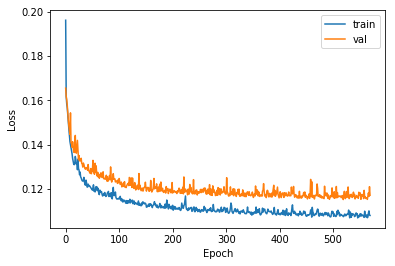

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

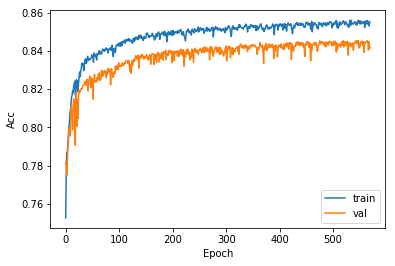

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
from keras.models import load_model
model.load_weights('/content/drive/My Drive/SSDL/Day3/Small_Unet_Pool_No_Aug/Weights/1Small_unet_pool.h5')

In [0]:
a = np.reshape(X_test[3],(128,128))
b = np.reshape(y_test[3],(128,128))

c = np.copy(a)
d = np.copy(b)

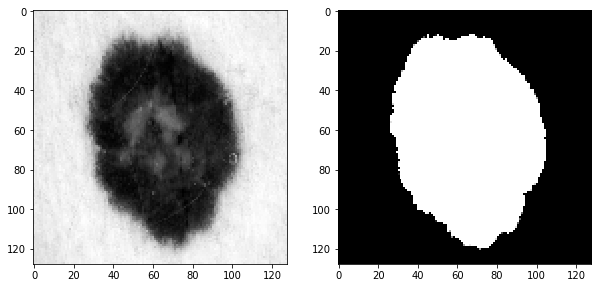

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(a, 'gray')
plt.subplot(122).imshow(b,'gray')

In [0]:
testing_image = np.reshape(X_test[3], (1,128,128,1))

In [0]:
prediction = model.predict(testing_image)
prediction.shape
prediction = prediction.reshape((128,128))

-0.15625493
1.2247152


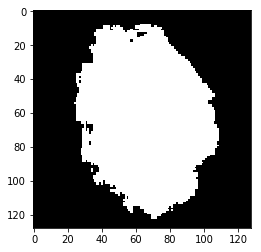

In [21]:
sample = prediction > 0.5
print(np.min(prediction))
print(np.max(prediction))
plt.imshow(sample, cmap = "gray")

Text(0.5, 0, 'PREDICTION')

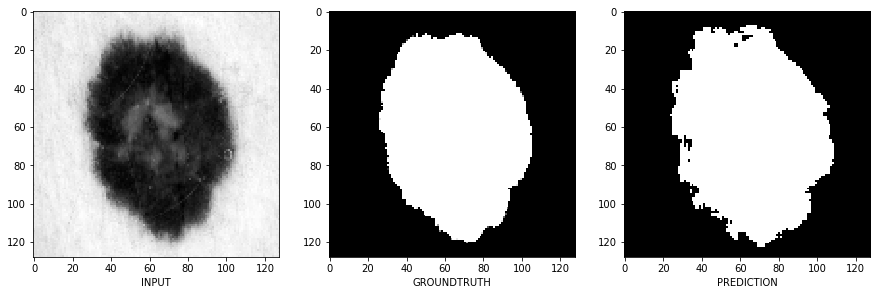

In [22]:
plt.figure(figsize=(15,15))

plt.subplot(131).imshow(c,'gray')
plt.xlabel('INPUT')

plt.subplot(132).imshow(d,'gray')
plt.xlabel('GROUNDTRUTH')

plt.subplot(133).imshow(sample,'gray')
plt.xlabel('PREDICTION')

In [23]:
train_pred = model.predict(X_train, batch_size=32)
train_result = np.zeros(train_pred.shape)
train_result[train_pred>0.5] = 1
train_result[train_pred<=0.5] = 0
dice = dc(train_result, y_train)
pre  = precision(train_result,y_train)
re   = recall(train_result,y_train)
print('Train dc: '  + str(dice))
print('Train pre: ' + str(pre))
print('Train re: '  + str(re))

Train dc: 0.7746032239511278
Train pre: 0.8965151215299642
Train re: 0.6818785150316781


In [24]:
test_pred = model.predict(X_test, batch_size=32)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
dice = dc(test_result, y_test)
pre  = precision(test_result,y_test)
re   = recall(test_result,y_test)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

Test dc: 0.5947121151539384
Test pre: 0.8367791842475387
Test re: 0.46127306559156456
